*********************************************************************************************************************************************
<b>Name</b>: Nandhana Rajeev

<b>Class</b>: 3 MSc DS B

<b>Reg No</b>: 23122125

*********************************************************************************************************************************************

<H2><b>RANDOM FOREST REGRESSION ANALYSIS</H2></B>

<B>Data Exploration</B>

In [151]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [152]:
# reading dataset

df=pd.read_csv('supermarket_sales.csv')
df

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [153]:
# printing the first 5 rows of the dataset

df.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [154]:
# printing sample rows of the dataset

df.sample(5)

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
112,227-78-1148,B,Mandalay,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,509.88,4.761905,25.4940,8.4
863,533-66-5566,B,Mandalay,Normal,Female,Home and lifestyle,51.07,7,17.8745,375.3645,01/12/19,11:42,Cash,357.49,4.761905,17.8745,7.0
931,756-93-1854,C,Naypyitaw,Member,Female,Fashion accessories,83.35,2,8.3350,175.0350,02/02/19,14:05,Credit card,166.70,4.761905,8.3350,9.5
487,795-49-7276,A,Yangon,Normal,Male,Fashion accessories,37.15,4,7.4300,156.0300,3/23/2019,18:59,Ewallet,148.60,4.761905,7.4300,8.3
76,263-10-3913,C,Naypyitaw,Member,Male,Fashion accessories,49.04,9,22.0680,463.4280,01/09/19,14:20,Credit card,441.36,4.761905,22.0680,8.6


In [155]:
# dimensions of the dataset

df.shape

(1000, 17)

In [156]:
# returns the concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

In [157]:
# returns statistical summary 

df.describe()

,unit_cost,quantity,5pct_markup,revenue,cogs,gm_pct,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [158]:
# displaying the number of unique data in each column

df.nunique()

invoice_id         1000
branch                3
city                  3
customer_type         2
gender_customer       2
product_line          6
unit_cost           943
quantity             10
5pct_markup         990
revenue             990
date                 89
time                506
payment_method        3
cogs                990
gm_pct                1
gross_income        990
rating               61
dtype: int64

In [159]:
# checking for duplicates in the dataset

df.duplicated().sum()

0

In [160]:
# checking for duplicates in the dataset

df.duplicated().sum()

0

<B>Data Preprocessing</b>

In [161]:
df = df.drop(columns=['invoice_id'])  # Drop unnecessary columns
df = df.drop(columns=['date','time'])
df

,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,payment_method,cogs,gm_pct,gross_income,rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [162]:
#for the data type of the column
str(df["gender_customer"].dtype)

'object'

In [163]:
#converting categorical values to continuous
for column in df.columns:
    if str(df[column].dtype) == "object":
        for i in range(len(df[column].unique())):
            df[column] = df[column].replace(df[column].unique()[i],i)

df

,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,payment_method,cogs,gm_pct,gross_income,rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1
1,1,1,1,0,1,15.28,5,3.8200,80.2200,1,76.40,4.761905,3.8200,9.6
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,4.761905,16.2155,7.4
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,1,0,40.35,1,2.0175,42.3675,0,40.35,4.761905,2.0175,6.2
996,2,2,1,0,2,97.38,10,48.6900,1022.4900,0,973.80,4.761905,48.6900,4.4
997,0,0,0,1,4,31.84,1,1.5920,33.4320,1,31.84,4.761905,1.5920,7.7
998,0,0,1,1,2,65.82,1,3.2910,69.1110,1,65.82,4.761905,3.2910,4.1


<b>Data Visualization</b>

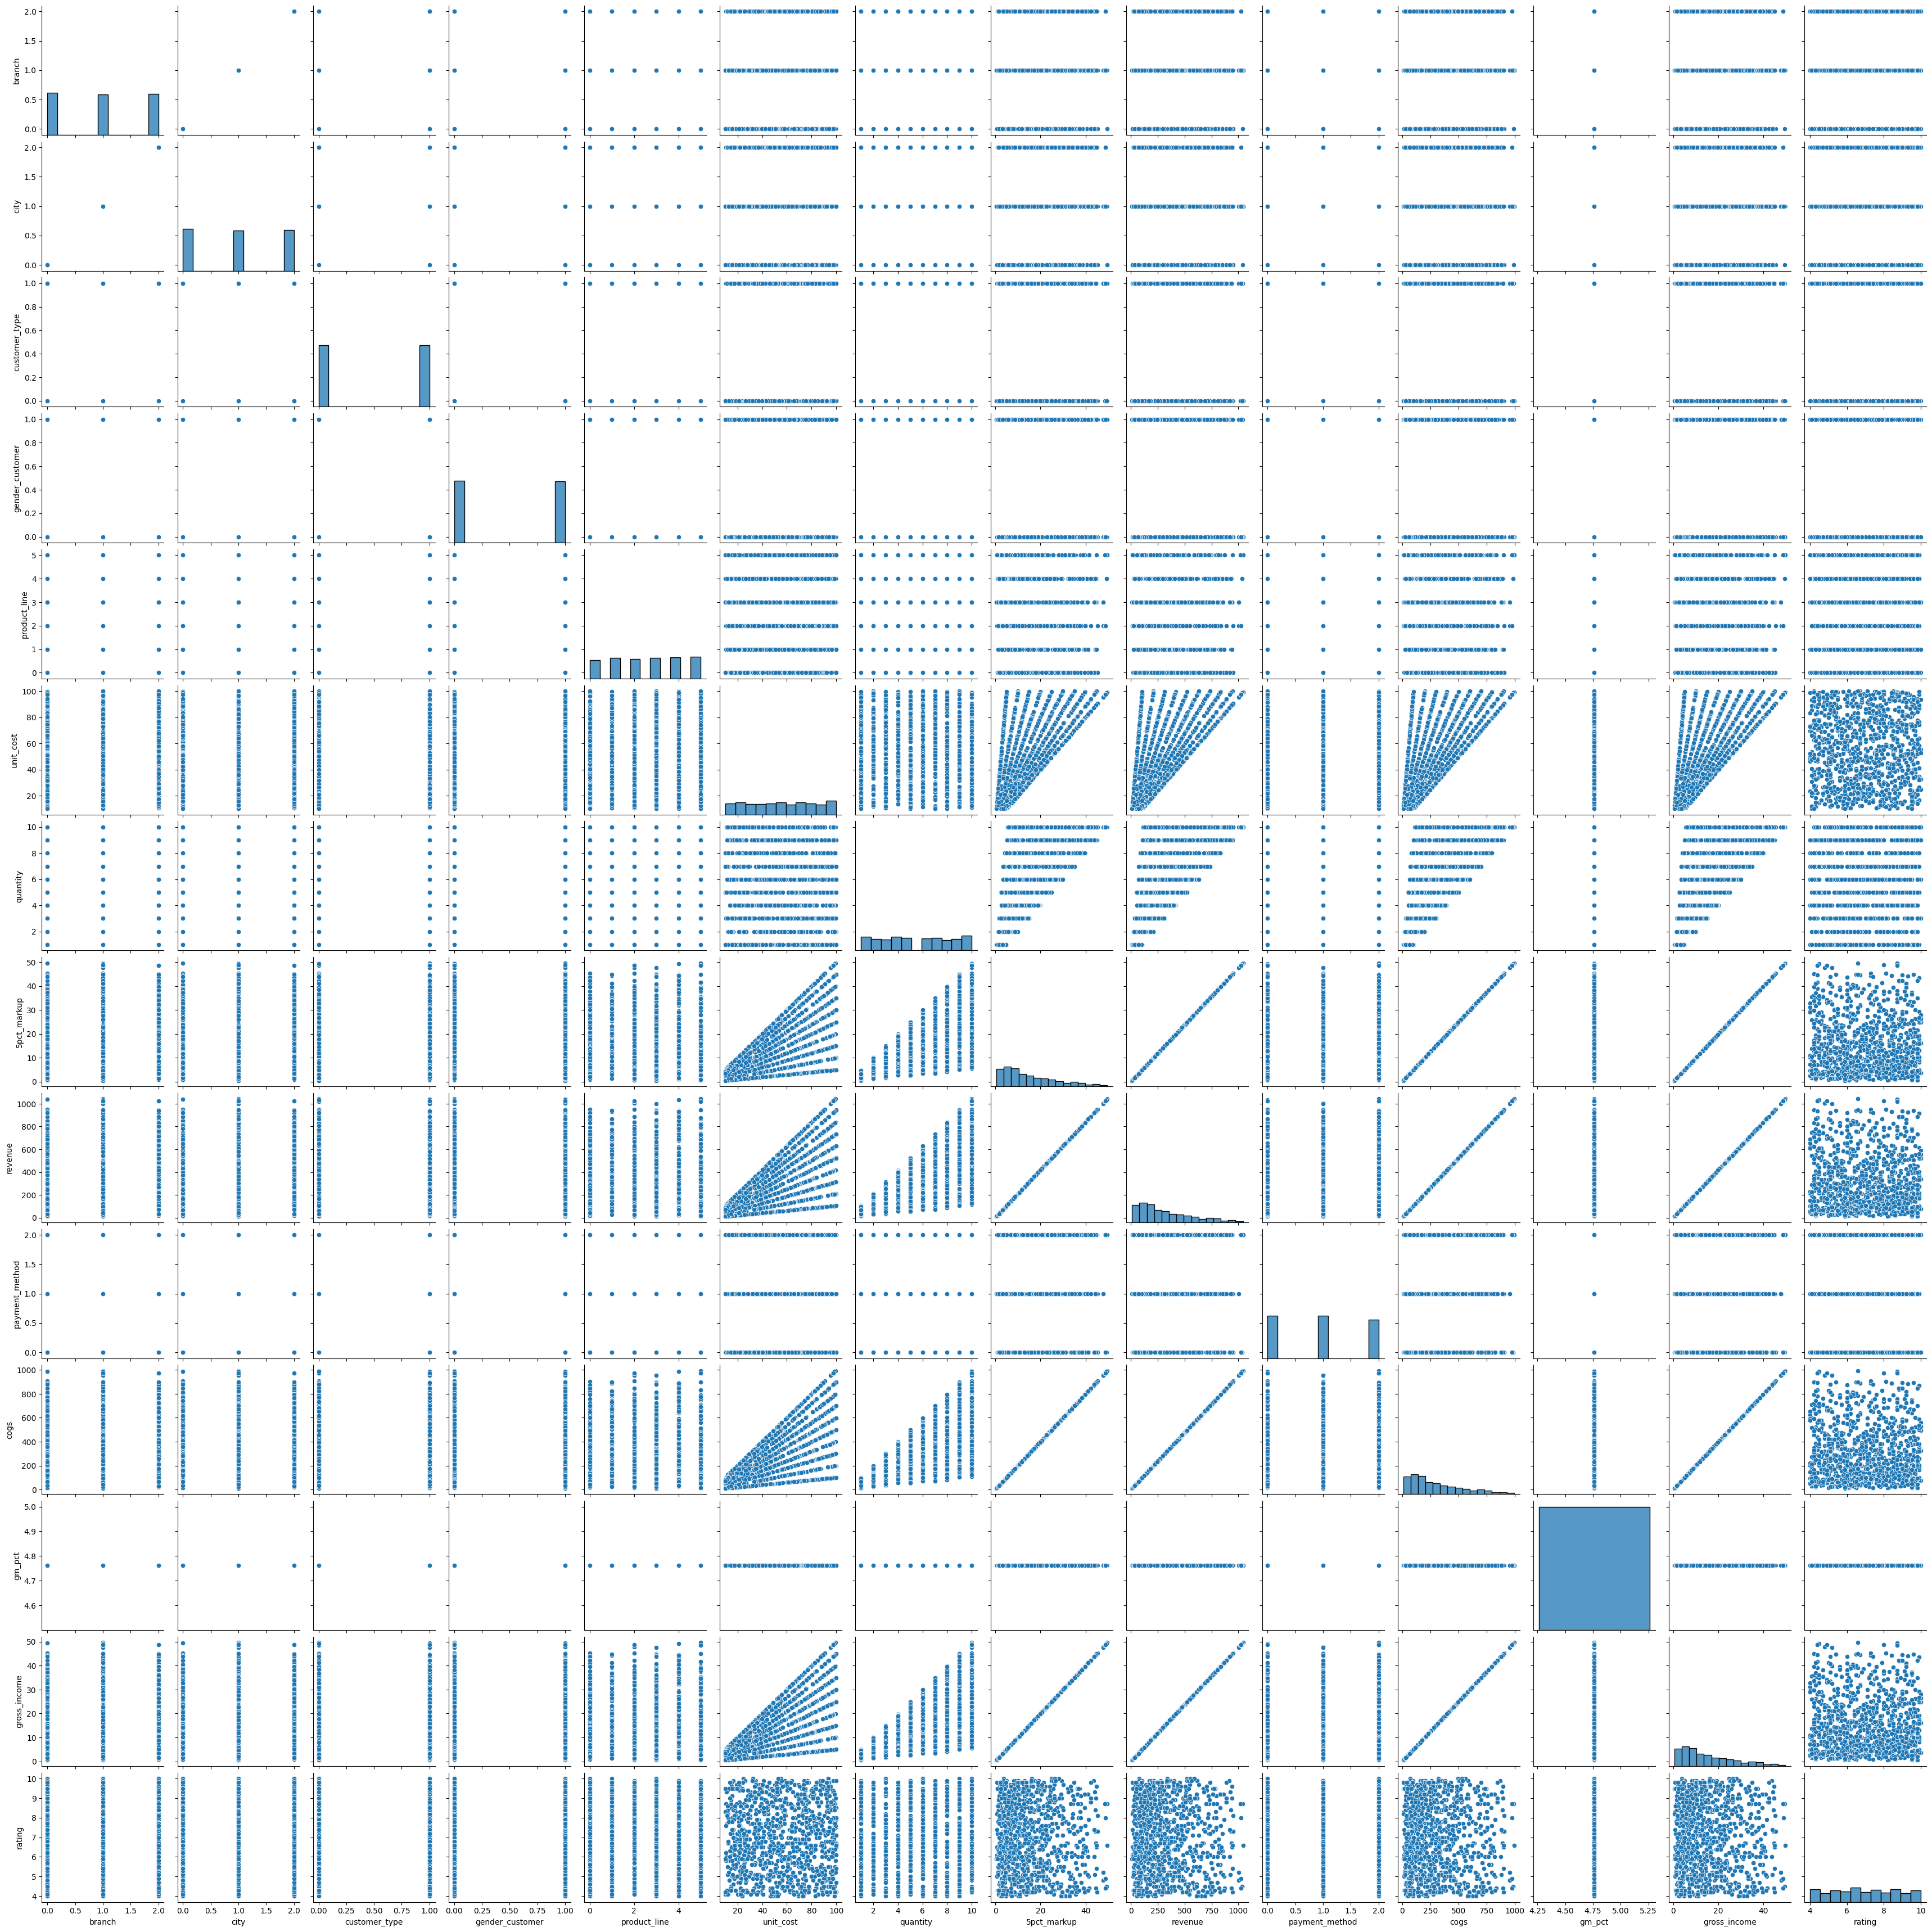

In [164]:
sns.pairplot(df)

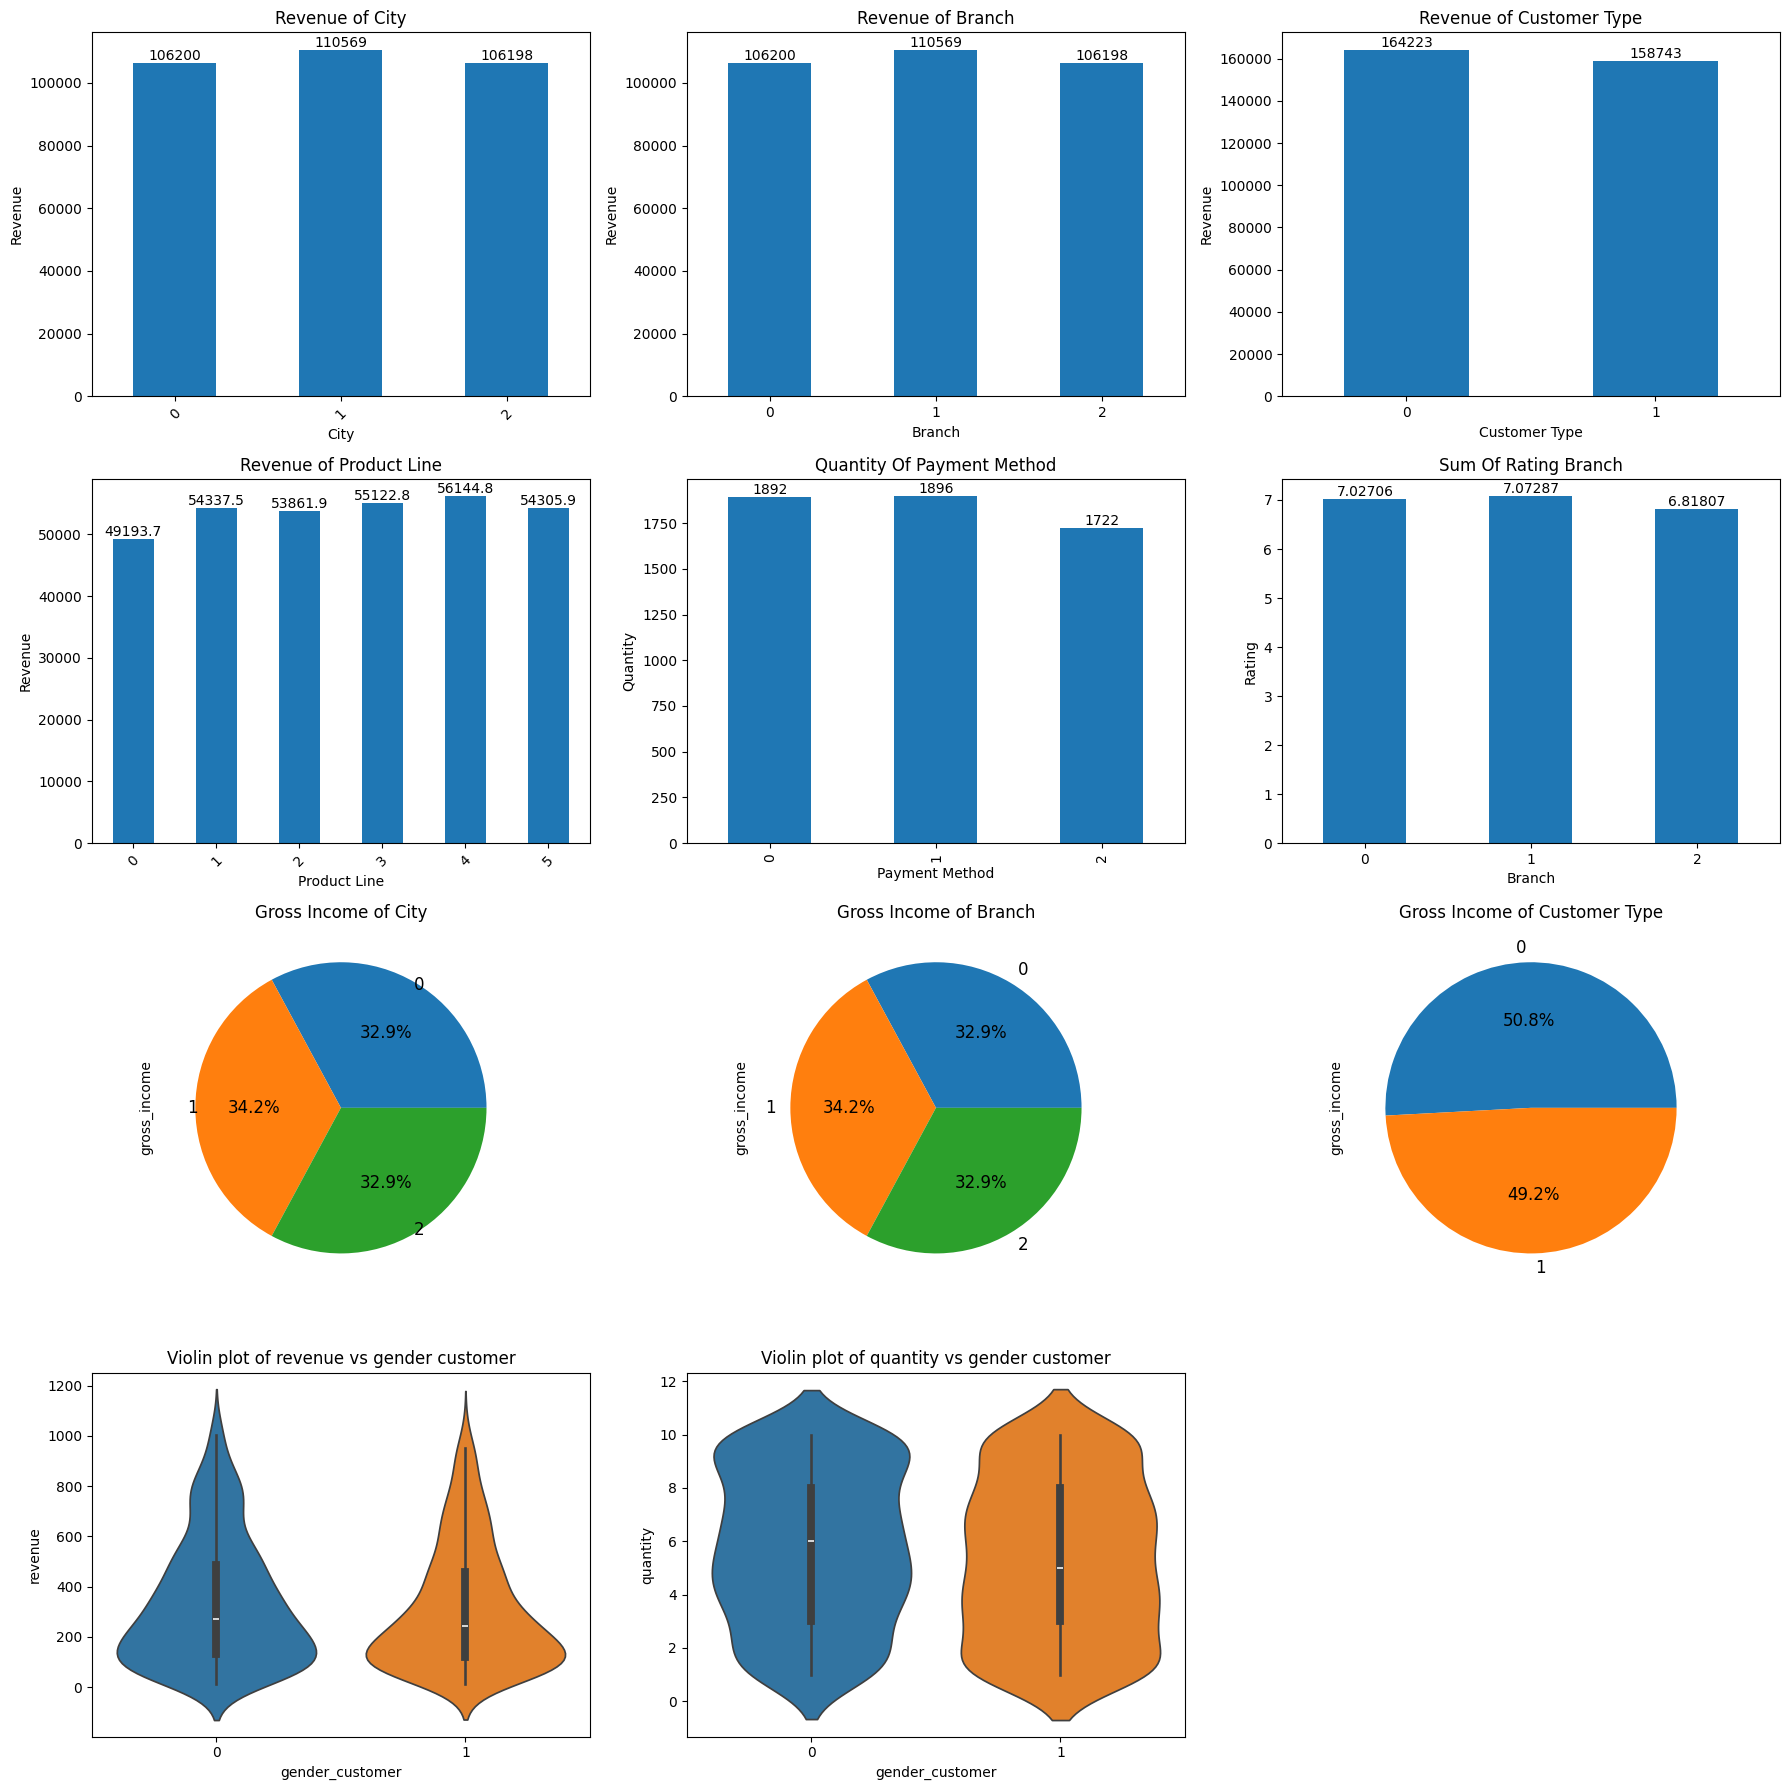

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

# Flatten the axes array
axes = axes.flatten()

# Plot 1: Revenue of City
city_revenue = df.groupby('city')['revenue'].sum()
city_revenue.plot(kind='bar', ax=axes[0])
axes[0].set_title('Revenue of City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Revenue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(axes[0].containers[0], label_type='edge')

# Plot 2: Revenue of Branch
branch_revenue = df.groupby('branch')['revenue'].sum()
branch_revenue.plot(kind='bar', ax=axes[1])
axes[1].set_title('Revenue of Branch')
axes[1].set_xlabel('Branch')
axes[1].set_ylabel('Revenue')
axes[1].tick_params(axis='x', rotation=0)
axes[1].bar_label(axes[1].containers[0], label_type='edge')

# Plot 3: Revenue of Customer Type
customer_type_revenue = df.groupby('customer_type')['revenue'].sum()
customer_type_revenue.plot(kind='bar', ax=axes[2])
axes[2].set_title('Revenue of Customer Type')
axes[2].set_xlabel('Customer Type')
axes[2].set_ylabel('Revenue')
axes[2].tick_params(axis='x', rotation=0)
axes[2].bar_label(axes[2].containers[0], label_type='edge')

# Plot 4: Revenue of Product Line
product_line_revenue = df.groupby('product_line')['revenue'].sum()
product_line_revenue.plot(kind='bar', ax=axes[3])
axes[3].set_title('Revenue of Product Line')
axes[3].set_xlabel('Product Line')
axes[3].set_ylabel('Revenue')
axes[3].tick_params(axis='x', rotation=45)
axes[3].bar_label(axes[3].containers[0], label_type='edge')

# Plot 5: Quantity Of Payment Method
payment_method_quantity = df.groupby('payment_method')['quantity'].sum()
payment_method_quantity.plot(kind='bar', ax=axes[4])
axes[4].set_title('Quantity Of Payment Method')
axes[4].set_xlabel('Payment Method')
axes[4].set_ylabel('Quantity')
axes[4].tick_params(axis='x', rotation=90)
axes[4].bar_label(axes[4].containers[0], label_type='edge')

# Plot 6: Sum Of Rating Branch
Sum_of_rating_branch = df.groupby('branch')['rating'].mean()
Sum_of_rating_branch.plot(kind='bar', ax=axes[5])
axes[5].set_title('Sum Of Rating Branch')
axes[5].set_xlabel('Branch')
axes[5].set_ylabel('Rating')
axes[5].tick_params(axis='x', rotation=0)
axes[5].bar_label(axes[5].containers[0], label_type='edge')

# Plot 7: Gross Income of City
city_gross_income = df.groupby('city')['gross_income'].sum()
city_gross_income.plot(kind='pie', labeldistance=0.98, autopct='%1.1f%%', ax=axes[6], textprops={"fontsize": 12})
axes[6].set_title('Gross Income of City')

# Plot 8: Gross Income of Branch
branch_gross_income = df.groupby('branch')['gross_income'].sum()
branch_gross_income.plot(kind='pie', autopct='%1.1f%%', ax=axes[7], textprops={"fontsize": 12})
axes[7].set_title('Gross Income of Branch')

# Plot 9: Gross Income of Customer Type
customer_type_gross_income = df.groupby('customer_type')['gross_income'].sum()
customer_type_gross_income.plot(kind='pie', autopct='%1.1f%%', ax=axes[8], textprops={"fontsize": 12})
axes[8].set_title('Gross Income of Customer Type')

# Plot 10: Violin plot of revenue vs gender customer
sns.violinplot(x='gender_customer', y='revenue', data=df, palette="tab10", ax=axes[9])
axes[9].set_title('Violin plot of revenue vs gender customer')

# Plot 11: Violin plot of quantity vs gender customer
sns.violinplot(x='gender_customer', y='quantity', data=df, palette="tab10", ax=axes[10])
axes[10].set_title('Violin plot of quantity vs gender customer')

# Hide the empty subplot
axes[11].axis('off')

plt.tight_layout()
plt.show()


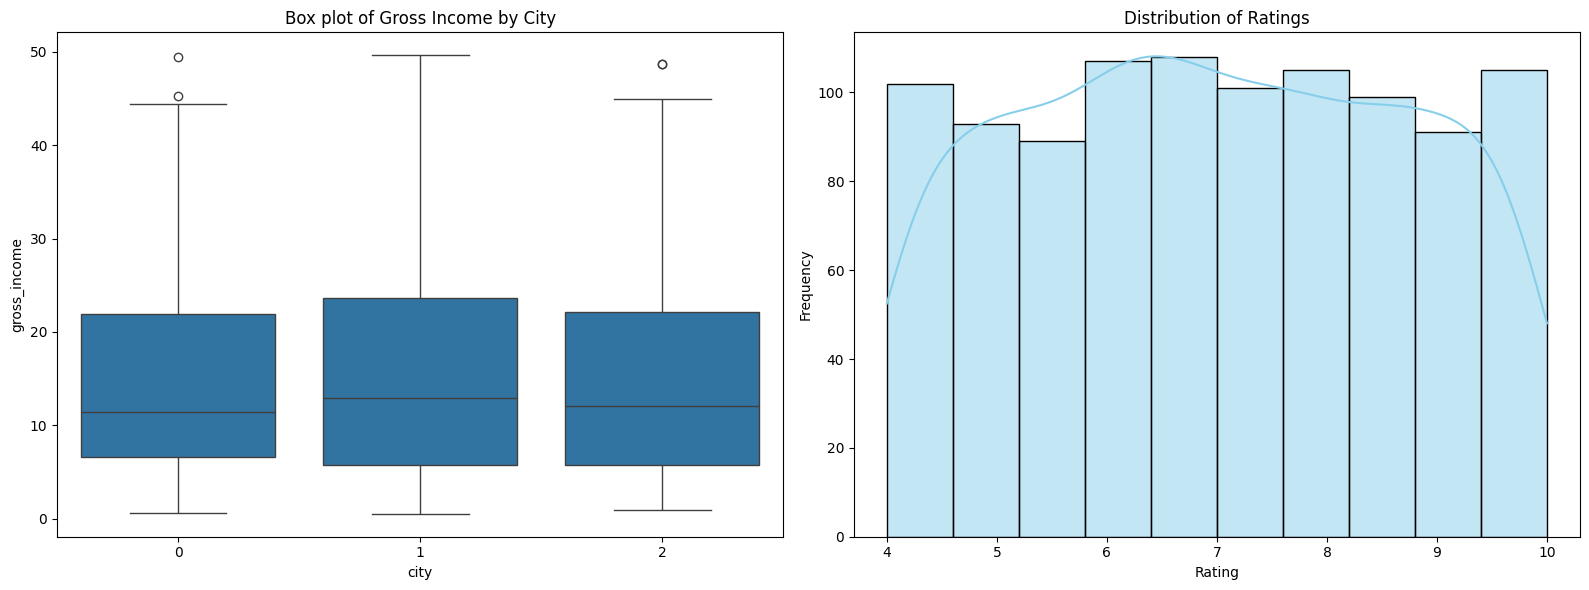

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Box plot of Gross Income by City
sns.boxplot(x='city', y='gross_income', data=df, ax=axes[0])
axes[0].set_title('Box plot of Gross Income by City')

# Plot 2: Distribution of Ratings
sns.histplot(df['rating'], kde=True, bins=10, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


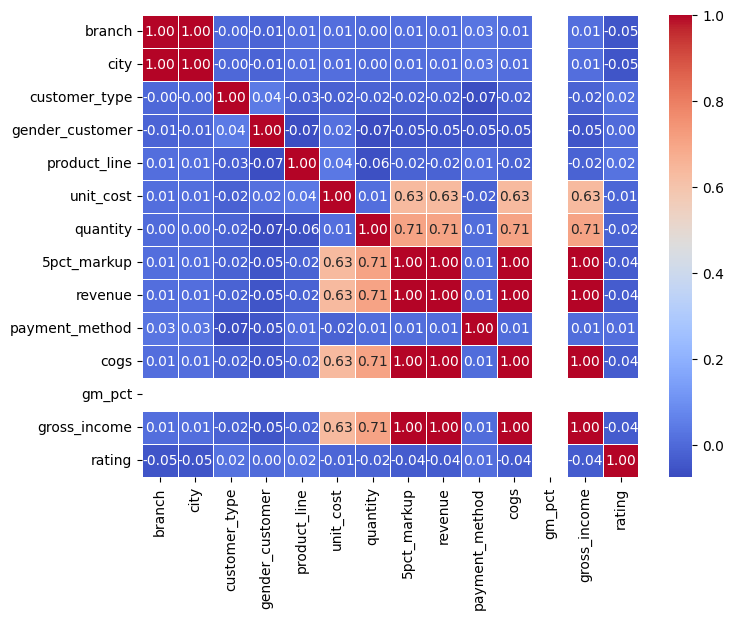

In [167]:
#plotting heatmap 
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [168]:
# Splitting the Data
from sklearn.model_selection import train_test_split

In [169]:
# Selected features for X
selected_features = ['customer_type','gender_customer','product_line','unit_cost','quantity','revenue','rating']
X = df[selected_features]

# Target variable for y
y = df['gross_income']

In [170]:
# Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)


<b>Training the Random Forest Regressor</b>

In [171]:
# Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [172]:
# Training the Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Fitting the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor()

<b>Making Predictions and Evaluating the Model of the testing set</b>

In [173]:
# Making Predictions
y_pred = rf_regressor.predict(X_test)

# Evaluating the Model
from sklearn.metrics import r2_score,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error is " ,mse)
print("R squared value is ",r2)

Mean Squared Error is  0.004523439876999656
R squared value is  0.9999663650259477


<b>Visualizing the Test Set Predictions</b>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


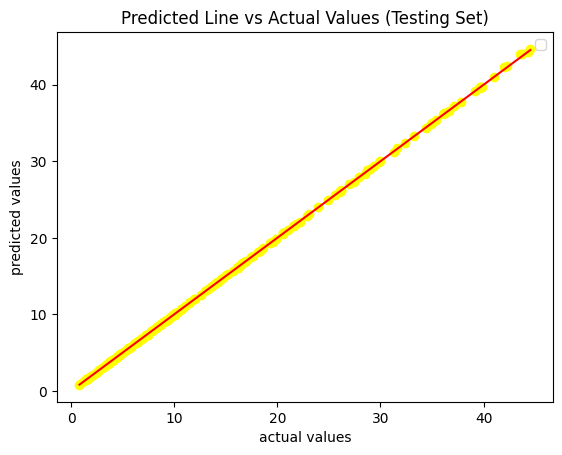

In [174]:
# Plotting the actual vs predicted values for the test set
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,  color='yellow')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red")

plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.title('Predicted Line vs Actual Values (Testing Set)')
plt.legend()
plt.show()

<b>Making Predictions and Evaluating the Model of the training set</b>

In [175]:
# Making predictions on the training set
y_pred_train = rf_regressor.predict(X_train)

# Evaluating the model performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Printing the evaluation metrics for the training set
print("Mean Squared Error on Training Set is ", mse_train)
print("R squared value on Training Set is ", r2_train)

Mean Squared Error on Training Set is  0.0008016159539375175
R squared value on Training Set is  0.9999941634776628


<b>Visualizing the Train Set Predictions</b>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


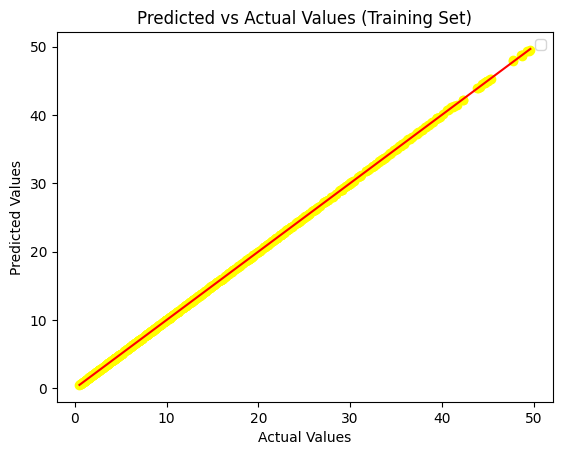

In [176]:
# Plotting the actual vs predicted values for the training set
plt.scatter(y_train, y_pred_train, color='yellow')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red")

plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Predicted vs Actual Values (Training Set)')
plt.legend()
plt.show()